<a href="https://colab.research.google.com/github/DepartmentOfStatisticsPUE/air-2022/blob/main/notebooks/7_regresja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

Wczytajmy dane dotyczące nieruchomości

In [2]:
rent = pd.read_excel("rent-poznan.xlsx")
rent.head(n=2)

,id,date_activ,date_modif,date_expire,individual,price,flat_area,flat_rooms,flat_floor_no,flat_build_year,flat_furnished,flat_rent,flat_deposit,flat_price_include_rent,flat_for_students,flat_heating,flat_status,flat_windows,building_floor_num,building_type,building_material,ad_title,ad_seller_id,ad_promo,flat_balcony,flat_utility_room,flat_garage,flat_basement,flat_garden,flat_tarrace,flat_lift,flat_two_level,flat_kitchen_sep,flat_air_cond,flat_nonsmokers,flat_washmachine,flat_dishwasher,flat_fridge,flat_cooker,flat_oven,flat_tv_device,flat_internet,flat_television,flat_phone,flat_anti_blinds,flat_anti_doors_windows,flat_intercom,flat_monitoring,flat_alarm_sys,flat_closed_area,quarter
0,19576742,2015-03-24,2020-09-05,2020-10-05,True,1400,30.0,1,2.0,0,True,360,1400.0,False,True,0.0,0.0,0.0,0,0.0,NaN,"Ładna, kawalerka. BEZPOŚREDNIO.",592916,False,False,False,False,True,False,False,False,False,True,False,False,True,True,True,True,True,False,False,False,False,False,False,True,False,False,False,Rataje
1,20292499,2013-07-19,2020-08-30,2020-09-09,True,4600,160.0,4,4.0,1900,True,0,0.0,False,True,1.0,0.0,0.0,5,1.0,0.0,Apartment in very center of Poznan - direct of...,226529,False,False,True,False,False,False,False,False,False,True,False,False,True,True,True,True,True,False,True,True,True,False,False,True,True,True,False,Stare Miasto


In [10]:
rent.dtypes

id                                  int64
date_activ                 datetime64[ns]
date_modif                 datetime64[ns]
date_expire                datetime64[ns]
individual                           bool
price                               int64
flat_area                         float64
flat_rooms                          int64
flat_floor_no                     float64
flat_build_year                     int64
flat_furnished                       bool
flat_rent                           int64
flat_deposit                      float64
flat_price_include_rent              bool
flat_for_students                    bool
flat_heating                      float64
flat_status                       float64
flat_windows                      float64
building_floor_num                  int64
building_type                     float64
building_material                 float64
ad_title                           object
ad_seller_id                        int64
ad_promo                          

Interesuje nas zbudowanie modelu regresji, w którym zmienną objaśnianą będzie cena (price), a zmienną objaśniającą będzie powierzchnia (flat_area).


W modelu regresji liniowej zakładamy następującą zależność

$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_k x_k + \epsilon, \; \epsilon \sim N(0, \sigma)
$$

na potrzeby naszego przykładu zakładamy model postaci

$$
y = \beta_0 + \beta_1 x_1 + \epsilon, \; \epsilon \sim N(0, \sigma).
$$

W pythonie, podobnie jak w R, korzystamy z następującej notacji modeli:

+ `y ~ x1` -- symbolem `~` oddzielamy zmienną objaśnianą (`y`) od zmiennej objaśniającej (`x1`)
+ `y ~ x1 + x2 + x3` -- po symbolu `+` podajemy kolejne zmienne objaśniające (niezależne)

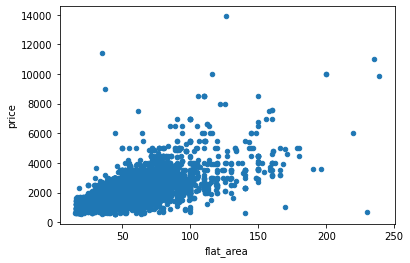

In [5]:
rent_sub = rent.query("price > 500 & price < 15000 & flat_area < 250 & flat_area > 15")
rent_sub.plot.scatter(x = "flat_area", y = "price")

In [8]:
model1 = smf.ols(formula= "price ~ flat_area", data = rent_sub)
model1_fit = model1.fit()
print(model1_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                 1.187e+04
Date:                Mon, 06 Dec 2021   Prob (F-statistic):               0.00
Time:                        11:00:27   Log-Likelihood:            -1.2425e+05
No. Observations:               16181   AIC:                         2.485e+05
Df Residuals:                   16179   BIC:                         2.485e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    624.2547     11.298     55.255      0.0

Zapiszmy powyższy model w formie równania

$$
\text{price} = 624.25 + 23.97 \times \text{flat_area}
$$

+ $\hat{\beta}_0 = 624.25$ -- oznacza, że cena nieruchomosci gdy `flat_area = 0` wynosi  `624.25` zł 
+ $\hat{\beta}_1 = 23.97$ -- oznacza, że jeżeli powierzchnia wzrośnie o jednostkę (`1 m2`), ceteris paribus, to cena wzrosnie o `23.97` zł

Zbudujemy model, w którym jedyną zmienną objaśniającą będzie kolumna `flat_heating` określająca typ ogrzewania.

In [9]:
model2 = smf.ols(formula= "price ~ flat_heating", data = rent_sub).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3.591
Date:                Mon, 06 Dec 2021   Prob (F-statistic):             0.0581
Time:                        11:19:12   Log-Likelihood:                -96048.
No. Observations:               12127   AIC:                         1.921e+05
Df Residuals:                   12125   BIC:                         1.921e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1785.0362      6.393    279.211   

Jeżeli w zbiorze danych mamy zmienną typu jakościowego (mierzoną na skali porządkowej lub nominalnej) to powinniśmy poinformować o tym `pandas` lub `statsmodels`. Jeżeli chcemy poinformować o tym `pandas` to musimy zadeklarować typ zmiennej w zbiorze danych (`astype("category")`). Jezeli chcemy zrobić to z poziomu `statsmodels` to w formule musimy wpisać `C(zmienna)`.

In [15]:
rent_sub.value_counts("flat_heating",  sort = False)

flat_heating
0.0    10105
1.0     1545
2.0        7
3.0      170
4.0      172
5.0      128
dtype: int64

In [11]:
model3 = smf.ols(formula= "price ~ C(flat_heating)", data = rent_sub).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     15.80
Date:                Mon, 06 Dec 2021   Prob (F-statistic):           1.52e-15
Time:                        11:25:20   Log-Likelihood:                -96010.
No. Observations:               12127   AIC:                         1.920e+05
Df Residuals:                   12121   BIC:                         1.921e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               1775

Zmienna `flat_heating` miała 6 poziomów ale w regresji liniowej pojawia się tylko 5 poziomów ponieważ kodowanie zmiennych jakościowych w modelach regresji odbywa się tak, że zawsze jest ich o jeden mniej. Poziom, którego nie widać w wydruku traktujemy jako poziom referencyjny.

$$
\text{price} = 1775 + 88 \times (FH == 1) - 888 \times(FH==2) - 314 \times (FH==3) -3 \times(FH == 4) - 88 \times(FH==5) 
$$

przykładowa interpretacja parametru 88: Jeżeli mamy dwa mieszkania o dokładnie takich samych charakterystykach (czyli mających tę samą powierzchnię, tę samą liczbę pokoi, zlokalizowanych w tym samym rejonie poznania itd) to jeżeli jedno ma ogrzewanie gazowe, a drugie ogrzewanie miejskie, to to pierwsze będzie droższe o średnio 88 zł. 

Określimy typ zmiennej na poziomie zbioru danych

In [22]:
rent_sub["fh"] = rent_sub["flat_heating"].astype("category")
rent_sub.fh.dtype

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


CategoricalDtype(categories=[0.0, 1.0, 2.0, 3.0, 4.0, 5.0], ordered=False)

In [23]:
model3a = smf.ols(formula= "price ~ fh", data = rent_sub).fit()
print(model3a.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     15.80
Date:                Mon, 06 Dec 2021   Prob (F-statistic):           1.52e-15
Time:                        11:45:05   Log-Likelihood:                -96010.
No. Observations:               12127   AIC:                         1.920e+05
Df Residuals:                   12121   BIC:                         1.921e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1775.8124      6.606    268.818      0.0

Aby zmienic poziom musimy wykorzystać następujący zapis

In [31]:
model3a = smf.ols(formula= "price ~ C(fh, Treatment(reference=1))", data = rent_sub).fit()
print(model3a.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     15.80
Date:                Mon, 06 Dec 2021   Prob (F-statistic):           1.52e-15
Time:                        11:48:59   Log-Likelihood:                -96010.
No. Observations:               12127   AIC:                         1.920e+05
Df Residuals:                   12121   BIC:                         1.921e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
